## Importing required libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

## Preprocessing and Exploring the Dataset

In [2]:
#Importing the Dataset Mydata.csv which contains the subject of the mail and its category
data = pd.read_csv('Mydata.csv', encoding='latin-1')
data.head()

,Subject,Category
0,Thank you for applying!,Job
1,Practice and practice again for IBPS PO Prelims,Others
2,Unacademy White Hat Unlocked!,Others
3,Just scheduled: PYTORCH GET STARTED,Others
4,Banushree is a new friend suggestion for you,Others


In [3]:
data.sample(10) #sample datapoints

,Subject,Category
762,Thank you for applying!,Job
812,Thank you for applying HashedIn!,Job
43,How is cognizant better than TCS?,Others
77,Florida Projects,Others
657,New group you may like: StarAgile Meetup Group,Others
536,"Full Time - PG Diploma in Data Science, collab...",Others
18,Exclusive Offer: Practical Machine Learning Co...,Others
60,SC1x Â Last chance to verify in SC1x! Week 4 ...,Others
251,"Chandrashekhar, start a conversation with your...",Others
726,"Chandrashekhar, interesting courses for UPSC C...",Others


In [4]:
data['Category'].value_counts() #chceking the value counts of two different categories

Others    624
Job       203
Name: Category, dtype: int64

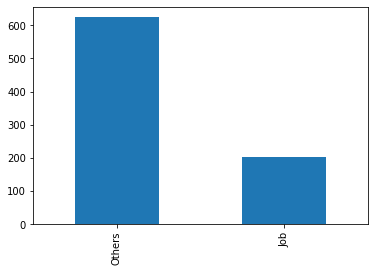

In [5]:
data['Category'].value_counts().plot.bar()

## Distribution of Subject words

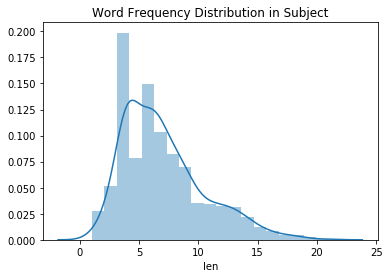

In [6]:
import seaborn as sns
data['len'] = data['Subject'].apply(lambda x: len(x.split()))
plt.title("Word Frequency Distribution in Subject")
sns.distplot(data['len']); #number of words in subject to check the distribution

#### Each review with more than 100 words was imported and tokenized. Afterward, all of the tokens that were punctuations, label, stopword, or not an English word (emoji, special character, foreign languages) were removed.

#### Following are the process followed:
* Lowercasing
* Tokenization
* Stemming and Lemmatization
* Removing Stopwords
* Removing Punctuations
* Removing Digits

In [7]:
# Import nltk packages and Punkt Tokenizer Models
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CHANDRU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
job_words = ''
other_words = ''

In [9]:
# Creating a corpus of job subjects        
for val in data[data['Category'] == 'Job'].Subject:
    Subject = val.lower() #converting words to lowercase
    tokens = nltk.word_tokenize(Subject) #tokenizing the words
    for words in tokens:
        job_words = job_words + words + ' '
# Creating a corpus of other subjects        
for val in data[data['Category'] == 'Others'].Subject:
    Subject = val.lower()
    tokens = nltk.word_tokenize(Subject)
    for words in tokens:
        other_words = other_words + words + ' '

## Creating  Spam wordcloud and ham wordcloud

#### WordClouds- to see which words are common in SPAM and NOT SPAM mesaages

In [10]:
job_wordcloud = WordCloud(width=500, height=300).generate(job_words)
other_wordcloud = WordCloud(width=500, height=300).generate(other_words)

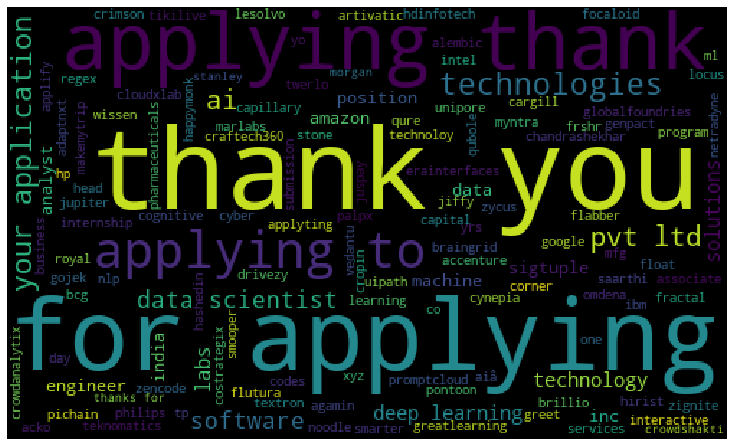

In [11]:
#Creating Job wordcloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(job_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

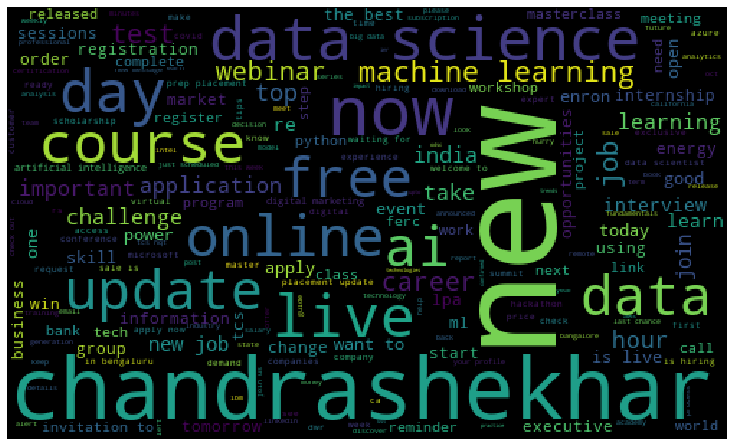

In [12]:
#Creating Others wordcloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(other_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [13]:
data = data.replace(['Job','Others'],[0, 1]) #replace job with 0 and others with 1

In [14]:
data.head()  #now you can also see the len of the subjects

,Subject,Category,len
0,Thank you for applying!,0,4
1,Practice and practice again for IBPS PO Prelims,1,8
2,Unacademy White Hat Unlocked!,1,4
3,Just scheduled: PYTORCH GET STARTED,1,5
4,Banushree is a new friend suggestion for you,1,8


# Remove punctuation  and stopwords from subjects

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CHANDRU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import string #importing string
def Subject_process(Subject):
    
    Subject = Subject.translate(str.maketrans('', '', string.punctuation)) #removing both punctuations and topwords
    Subject = [word for word in Subject.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(Subject)

In [17]:
data['Subject'] = data['Subject'].apply(Subject_process)

In [18]:
data.sample(10)

,Subject,Category,len
353,ODSC Bengaluru Data Science list Bayesian Mach...,1,18
687,Lightning Web Components Open Sourced,1,5
289,Understanding Saturn Birth Chart,1,6
204,Data science Tweeted Introduction Machine Lear...,1,10
569,youre getting DSDJ,1,5
28,DAY 26 SPEECH PROCESSING USING MATLAB,1,6
391,Start remote internship 50 Scholarship Great L...,1,14
497,use Machine Learning handwriting analysis,1,8
470,Opportunity place best talent leading Companie...,1,13
189,CPUC Decision Suspending Direct Access,1,5


In [19]:
Subject = pd.DataFrame(data['Subject']) #creating dataframe
Category = pd.DataFrame(data['Category'])

## Counting how many times a word appears in the dataset


In [20]:
from collections import Counter

total_counts = Counter()
for i in range(len(Subject)):
    for word in Subject.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  2092


In [21]:
total_counts

Counter({'Thank': 200,
         'applying': 157,
         'Practice': 1,
         'practice': 1,
         'IBPS': 2,
         'PO': 2,
         'Prelims': 1,
         'Unacademy': 2,
         'White': 1,
         'Hat': 1,
         'Unlocked': 1,
         'scheduled': 6,
         'PYTORCH': 1,
         'GET': 1,
         'STARTED': 1,
         'Banushree': 1,
         'new': 19,
         'friend': 1,
         'suggestion': 1,
         'HeyÂ': 1,
         'ChandrashekharÂ': 1,
         'need': 3,
         '2': 11,
         'Minutes': 3,
         'Win': 6,
         'CNBC': 1,
         'Awards': 2,
         'RTO': 1,
         'Orders': 1,
         'Grid': 1,
         'South': 2,
         'SE': 1,
         'Trans': 1,
         'SPP': 1,
         'Entergy': 1,
         'Much': 1,
         'Data': 45,
         'Scientists': 3,
         'Make': 4,
         'Year': 2,
         'Become': 2,
         'Product': 2,
         'Manager': 1,
         'Want': 5,
         'Register': 6,
         'Ken':

In [22]:
# Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)

print(vocab[:50])

['Thank', 'applying', 'Data', 'Chandrashekhar', 'Applying', 'New', 'new', 'Science', 'Learning', 'AI', 'Machine', 'India', 'Online', 'Live', 'Update', 'Join', 'Apply', '2', 'TCS', 'Day', '1', 'application', 'live', 'jobs', 'Get', 'best', 'learning', 'Technologies', 'Important', '2020', 'job', 'Digital', 'ML', 'Placement', 'Test', 'Check', 'Challenge', 'Bengaluru', 'Career', 'get', 'Pvt', 'Ltd', 'LPA', 'Learn', 'Free', 'Webinar', 'Access', 'Energy', 'scheduled', 'Win']


In [23]:
# Mapping from words to index
vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [24]:
# Subject to Vector
def Subject_to_vector(Subject):
    word_vector = np.zeros(vocab_size)
    for word in Subject.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [25]:
# Convert all titles to vectors
word_vectors = np.zeros((len(Subject), len(vocab)), dtype=np.int_)
for i, (_, Subject_) in enumerate(Subject.iterrows()):
    word_vectors[i] = Subject_to_vector(Subject_[0])

In [26]:
vocab_size,len(Subject), len(vocab)

(2092, 827, 2092)

In [27]:
word_vectors.shape

(827, 2092)

## Converting words to vectors using TFIDF Vectorizer 

In [28]:
#importing TfidfVectorizer which transforms text to feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['Subject'])
vectors.shape

(827, 1810)

In [29]:
#features = word_vectors
features = vectors

## Splitting into dataset into train and test set

In [30]:
#train = 80% and test = 20%
X_train, X_test, y_train, y_test = train_test_split(features, data['Category'], test_size=0.2, random_state=111)

In [31]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(661, 1810)
(166, 1810)
(661,)
(166,)


## Model building to classify the subjects into two categories

In [32]:
#Using various algorithms to build the model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
#setting parameters to build a model
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [34]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [35]:
#here we are defining two functions train - which fits the features and targets i.e subjects and categories and predict - this function to predict the test set features
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [36]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [37]:
pred_scores_word_vectors

[('SVC', [1.0]),
 ('KN', [1.0]),
 ('NB', [0.8975903614457831]),
 ('DT', [0.9879518072289156]),
 ('LR', [1.0]),
 ('RF', [0.9879518072289156])]

In [38]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [39]:
def myFunc(x):
    if x == 0:
        return True
    else:
        return False

results = filter(myFunc, pred)

for x in results:
    print(x)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [40]:
x = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [41]:
x = x.replace([0],['Job'])

In [42]:
x.to_csv("Filtered.csv", index=False)

In [43]:
x.shape

(38,)

## Time to test our model


In [44]:
def find(x): #defining a function x=0 means job if condition satisfies it will preint first statement or else statement
    if x == 0:
        print ("Subject is of Job Category")
    else:
        print ("Subject is of Other category")
newtext = ["Thank you for applying to Love_Alert"]
integers = vectorizer.transform(newtext)
x = svc.predict(integers)[0] #using svc, we can use any of the above built models to predict the category
find(x)     

Subject is of Job Category


In [45]:
def find(x):
    if x == 0:
        print ("Subject is of Job Category")
    else:
        print ("Subject is of Other category")
newtext = ["Abhishek is a new friend suggestion for you"]
integers = vectorizer.transform(newtext)
x = svc.predict(integers)[0]
find(x)     

Subject is of Other category


## Saving and loading the model again to predict

In [46]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(svc, open(filename, 'wb'))

In [47]:
loaded_model = pickle.load(open(filename, 'rb'))

In [48]:
result = loaded_model.score(X_test, y_test)
print(result)

1.0
